### Seattle Collision Severity Prediction


In [1]:
import pandas as pd
import numpy as np

In [2]:
#import the dataset into a dataframe
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',index_col = 3)
df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 37)

In [3]:
#pull only the necessary features from the dataframe
features = df[['SEVERITYCODE','ADDRTYPE','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
features.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
OBJECTID,,,,,,,,
1,2,Intersection,At Intersection (intersection related),N,Overcast,Wet,Daylight,NaN
2,1,Block,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,NaN
3,1,Block,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,NaN
4,1,Block,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,NaN
5,2,Intersection,At Intersection (intersection related),0,Raining,Wet,Daylight,NaN


In [4]:
#map speeding to 1 and 0
features['SPEEDING'] = features['SPEEDING'].fillna('N')
features['SPEEDING'] = features['SPEEDING'].map({'Y': 1, 'N': 0})
features.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
OBJECTID,,,,,,,,
1,2,Intersection,At Intersection (intersection related),N,Overcast,Wet,Daylight,0
2,1,Block,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0
3,1,Block,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0
4,1,Block,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0
5,2,Intersection,At Intersection (intersection related),0,Raining,Wet,Daylight,0


In [5]:
#map under the influence to 1 and 0
features['UNDERINFL'] = features['UNDERINFL'].map({'Y': 1, 'N': 0})
features['UNDERINFL'] = features['UNDERINFL'].fillna(0)
features.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
OBJECTID,,,,,,,,
1,2,Intersection,At Intersection (intersection related),0.0,Overcast,Wet,Daylight,0
2,1,Block,Mid-Block (not related to intersection),0.0,Raining,Wet,Dark - Street Lights On,0
3,1,Block,Mid-Block (not related to intersection),0.0,Overcast,Dry,Daylight,0
4,1,Block,Mid-Block (not related to intersection),0.0,Clear,Dry,Daylight,0
5,2,Intersection,At Intersection (intersection related),0.0,Raining,Wet,Daylight,0


In [6]:
#drop any remaining rows with NaN values
features.dropna(inplace = True)
features.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(182914, 8)

In [7]:
#Delete "Unknown" and "Other" values
features = features[features.JUNCTIONTYPE != 'Unknown']
features = features[features.WEATHER != 'Unknown']
features = features[features.WEATHER != 'Other']
features = features[features.ROADCOND != 'Unknown']
features = features[features.ROADCOND != 'Other']
features = features[features.LIGHTCOND != 'Unknown']
features = features[features.LIGHTCOND != 'Other']
features.shape

(167335, 8)

In [8]:
#get counts for the two severity codes
features['SEVERITYCODE'].value_counts()

1    112015
2     55320
Name: SEVERITYCODE, dtype: int64

In [9]:
#data is heavily skewed toward severity code 1 ('property damage')
#down-sample severity code 1 so that the data is balanced
from sklearn.utils import resample
df_majority = features[features.SEVERITYCODE == 1]
df_minority = features[features.SEVERITYCODE == 2]
df_majority_downsampled = resample(df_majority, replace = False, n_samples = 55320, random_state = 123)
downsampled = pd.concat([df_majority_downsampled, df_minority])
downsampled.shape

(110640, 8)

In [10]:
#create dummy variables for each severity code for graphing purposes
dummy = pd.get_dummies(downsampled["SEVERITYCODE"])
dummy.rename(columns={1:'Property Damage', 2:'Injury'}, inplace=True)
downsampled = pd.concat([downsampled, dummy], axis=1)
downsampled.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Property Damage,Injury
OBJECTID,,,,,,,,,,
108209,1,Block,Mid-Block (not related to intersection),0.0,Clear,Dry,Daylight,0,1,0
148818,1,Intersection,At Intersection (intersection related),0.0,Clear,Dry,Dark - Street Lights On,0,1,0
146271,1,Block,Mid-Block (not related to intersection),0.0,Clear,Dry,Daylight,0,1,0
205403,1,Block,Mid-Block (not related to intersection),0.0,Raining,Wet,Dusk,0,1,0
188635,1,Block,Mid-Block (not related to intersection),0.0,Clear,Dry,Daylight,0,1,0


In [11]:
#make sub-dataframes to see where noticeable differences are 
addrtype = downsampled.groupby(['ADDRTYPE'])[['Property Damage','Injury']].agg('sum')
addrtype

,Property Damage,Injury
ADDRTYPE,,
Alley,77.0,28.0
Block,38279.0,28500.0
Intersection,16964.0,26792.0


In [12]:
junctiontype = downsampled.groupby(['JUNCTIONTYPE'])[['Property Damage','Injury']].agg('sum')
junctiontype

,Property Damage,Injury
JUNCTIONTYPE,,
At Intersection (but not related to intersection),570.0,599.0
At Intersection (intersection related),16386.0,26184.0
Driveway Junction,3346.0,3128.0
Mid-Block (but intersection related),6954.0,6967.0
Mid-Block (not related to intersection),28012.0,18393.0
Ramp Junction,52.0,49.0


In [13]:
underinfl = downsampled.groupby(['UNDERINFL'])[['Property Damage','Injury']].agg('sum')
underinfl

,Property Damage,Injury
UNDERINFL,,
0.0,53846.0,53435.0
1.0,1474.0,1885.0


In [14]:
weather = downsampled.groupby(['WEATHER'])[['Property Damage','Injury']].agg('sum')
weather

,Property Damage,Injury
WEATHER,,
Blowing Sand/Dirt,17.0,12.0
Clear,35295.0,35364.0
Fog/Smog/Smoke,190.0,182.0
Overcast,8929.0,8563.0
Partly Cloudy,2.0,3.0
Raining,10523.0,11000.0
Severe Crosswind,6.0,7.0
Sleet/Hail/Freezing Rain,38.0,27.0
Snowing,320.0,162.0


In [15]:
roadcond = downsampled.groupby(['ROADCOND'])[['Property Damage','Injury']].agg('sum')
roadcond

,Property Damage,Injury
ROADCOND,,
Dry,39558.0,39403.0
Ice,387.0,258.0
Oil,14.0,24.0
Sand/Mud/Dirt,20.0,21.0
Snow/Slush,347.0,154.0
Standing Water,36.0,27.0
Wet,14958.0,15433.0


In [16]:
lightcond = downsampled.groupby(['LIGHTCOND'])[['Property Damage','Injury']].agg('sum')
lightcond

,Property Damage,Injury
LIGHTCOND,,
Dark - No Street Lights,481.0,317.0
Dark - Street Lights Off,388.0,306.0
Dark - Street Lights On,15738.0,14171.0
Dark - Unknown Lighting,1.0,3.0
Dawn,795.0,801.0
Daylight,36136.0,37834.0
Dusk,1781.0,1888.0


In [17]:
speeding = downsampled.groupby(['SPEEDING'])[['Property Damage','Injury']].agg('sum')
speeding

,Property Damage,Injury
SPEEDING,,
0,52596.0,51892.0
1,2724.0,3428.0


In [18]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

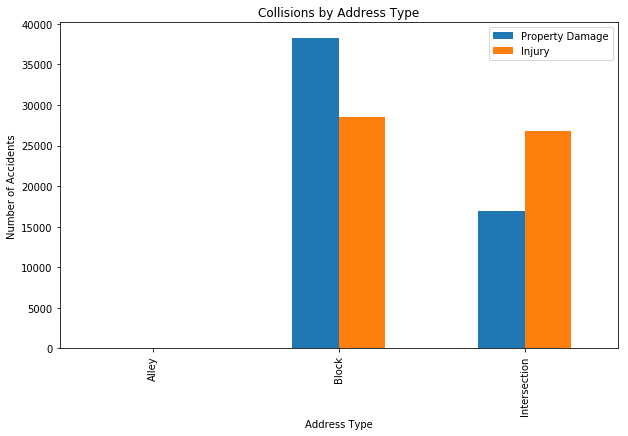

In [19]:
#noticeable variances are in address type and junction type
#plot those two for a visual
addrtype.plot(kind='bar', figsize=(10, 6))

plt.title('Collisions by Address Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Address Type')

plt.show()

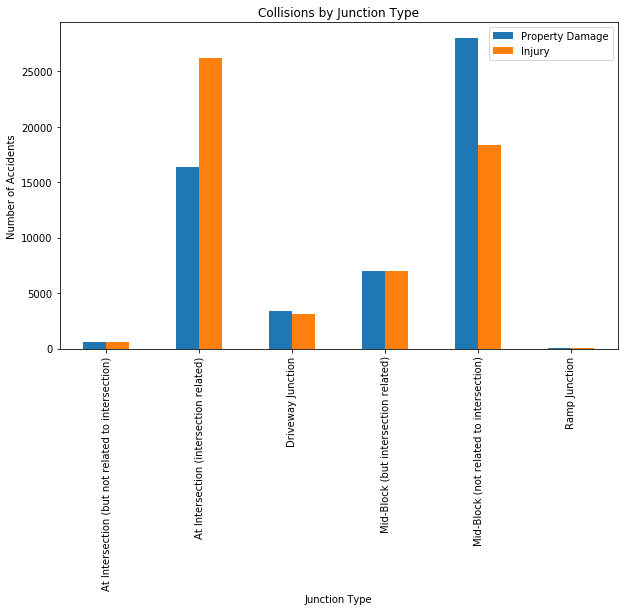

In [20]:
junctiontype.plot(kind='bar', figsize=(10, 6))

plt.title('Collisions by Junction Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Junction Type')

plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

In [23]:
#create our X variable and map all the string variables to integers
X = downsampled[['ADDRTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING']].values

le_ADDRTYPE = preprocessing.LabelEncoder()
le_ADDRTYPE.fit(['Alley','Block', 'Intersection'])
X[:,0] = le_ADDRTYPE.transform(X[:,0]) 


le_JUNCTIONTYPE = preprocessing.LabelEncoder()
le_JUNCTIONTYPE.fit(['Mid-Block (not related to intersection)',
       'At Intersection (intersection related)',
       'Mid-Block (but intersection related)', 'Driveway Junction',
       'At Intersection (but not related to intersection)',
       'Ramp Junction'])
X[:,1] = le_JUNCTIONTYPE.transform(X[:,1])


le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit(['Clear', 'Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke',
       'Sleet/Hail/Freezing Rain', 'Severe Crosswind',
       'Blowing Sand/Dirt', 'Partly Cloudy'])
X[:,3] = le_WEATHER.transform(X[:,3]) 

le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit(['Dry', 'Wet', 'Snow/Slush', 'Ice', 'Standing Water', 'Oil',
       'Sand/Mud/Dirt'])
X[:,4] = le_ROADCOND.transform(X[:,4]) 

le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit(['Daylight', 'Dark - Street Lights On', 'Dusk',
       'Dark - Street Lights Off', 'Dawn', 'Dark - No Street Lights',
       'Dark - Unknown Lighting'])
X[:,5] = le_LIGHTCOND.transform(X[:,5]) 

X[0:5]

array([[1, 4, 0.0, 1, 0, 5, 0],
       [2, 1, 0.0, 1, 0, 2, 0],
       [1, 4, 0.0, 1, 0, 5, 0],
       [1, 4, 0.0, 5, 6, 6, 0],
       [1, 4, 0.0, 1, 0, 5, 0]], dtype=object)

In [49]:
#create the dependent variable
y = downsampled['SEVERITYCODE']
y[0:5]

OBJECTID
108209    1
148818    1
146271    1
205403    1
188635    1
Name: SEVERITYCODE, dtype: int64

In [25]:
#create train & test sets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [26]:
#create the decision tree
collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [27]:
#fit the collision tree to the training set
collisionTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
#use the decision tree to make a prediction based on the test set
predTree = collisionTree.predict(X_testset)

In [51]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
OBJECTID
20695     2
155072    2
113258    1
122969    1
47833     2
Name: SEVERITYCODE, dtype: int64


In [38]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.593878042901904


In [37]:
#try SVM to see if we get a different result
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
yhat = clf.predict(X_testset)
yhat [0:5]

array([1, 1, 1, ..., 1, 2, 2])

In [53]:
from sklearn.metrics import f1_score
f1_score(y_testset, yhat, average='weighted')

0.5948010465382899

In [54]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testset, yhat)

0.5948722583755122